# Linear Regression

## Iris dataset  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
from sklearn import datasets 
iris = datasets.load_iris() 
# iris

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
X_all.shape

(150, 4)

In [ ]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

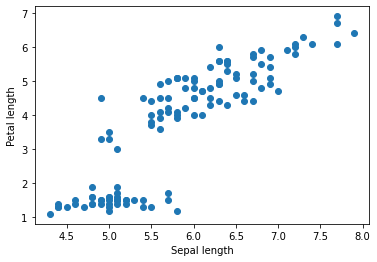

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [ ]:
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.781
Test Score : 0.653


In [ ]:
print(linr.coef_, linr.intercept_)

[1.86833121] -7.16592370694144


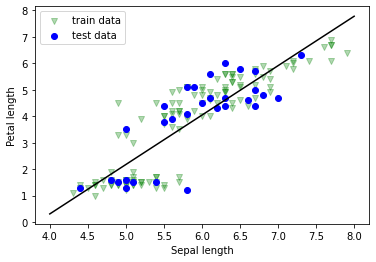

In [ ]:
plt.scatter(X_train, y_train, marker='v', c='g', alpha=0.3) 
plt.scatter(X_test, y_test, marker='o', c='b') 
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * xx + linr.intercept_, "k-")

- let's try predict  the petal width using the other 3 features

In [ ]:
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

X, y = X_all[:, 0:3], X_all[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.score(X_test, y_test), adj_R2(X_test, y_test, linr.score(X_test, y_test)))
linr.coef_, linr.intercept_

0.9246148143053589 0.9159165236482849


(array([-0.26173785,  0.25823429,  0.55530139]), -0.1493362338217219)

## KFold() Cross Validation 

In [ ]:
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv)

print(score.round(2))
print(score.mean().round(2))

[0.82 0.81 0.73 0.61 0.74]
0.74


In [ ]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [ ]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  28  29  30  31  33  34  36  37  38  39  40
  41  42  43  44  45  46  48  50  51  52  53  54  55  56  59  60  61  62
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  80  81  82  84
  85  86  87  88  90  91  93  94 100 101 102 103 104 105 107 108 109 110
 111 112 113 114 116 117 118 119 123 125 126 127 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 144 145 146 148] 
 TEST:
 [  1   5  27  32  35  47  49  57  58  63  78  79  83  89  92  95  96  97
  98  99 106 115 120 121 122 124 128 143 147 149]
TRAIN:
 [  0   1   3   5   6   7   8   9  10  12  13  15  16  17  18  19  20  21
  22  23  25  26  27  31  32  33  34  35  38  39  40  41  42  43  45  46
  47  48  49  50  52  53  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  75  76  78  79  80  82  83  85  86  87  88  89
  91  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109

In [ ]:
## using decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.7405727992081567


## 몸무게 예측

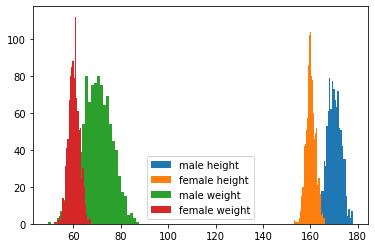

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.97267116]
0.8932978539428351


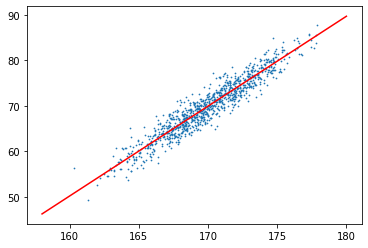

In [ ]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.04025188] -106.449153389015
0.8275549556311431


In [ ]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
# put together
x = np.concatenate((x1, x2))   # height
y = np.concatenate((y1, y2))   # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.14483057] -123.96243647097627
0.8623633584584873


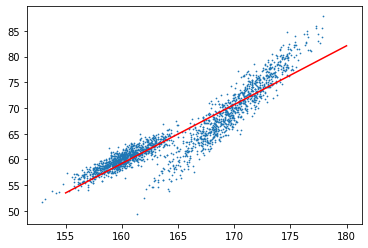

In [ ]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

- Now, we will add another feature (sex)

In [ ]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [ ]:
X.tail()

height  sex
1995  161.464175    1
1996  161.096035    1
1997  160.253927    1
1998  164.167358    1
1999  160.299821    1

In [ ]:
y[-5:]

array([60.84218668, 59.75017187, 60.51992218, 64.73108964, 62.96417625])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.70819027 6.93040365] -220.37357082232563
0.9037410458244002


In [ ]:
## 위의 결과는 1.67*zl + 6.8*성별 - 215.43 의 선형 모델 구성
## score 는 92 % 로 향상
## 성별은 0(남성), 1(여성)

In [ ]:
X_train[:10]

height  sex
1886  156.956709    1
1286  156.349909    1
1541  163.684040    1
40    171.027468    0
72    171.593066    0
365   169.689565    0
1036  159.272977    1
1519  159.539319    1
846   173.926174    0
628   175.182237    0

In [ ]:
# K-Fold Cross validation (교차겸증)
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X.shape

(2000, 2)

In [ ]:
cv = KFold(n_splits=5, shuffle=True) # Whether to shuffle the data before 
                                      # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.92460433, 0.90913164, 0.92023157, 0.92424553, 0.91785891]),
 0.9192143966399714)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 0.999950665372645
Test score: 0.8849840165726156


In [ ]:
X_train[:5]

height  sex
1886  156.956709    1
1286  156.349909    1
1541  163.684040    1
40    171.027468    0
72    171.593066    0

In [ ]:
y_train[:5]

array([54.71311093, 54.85288937, 62.47652967, 69.51958629, 71.29336202])

# Additional for Linear Regression
- adjusted R-squared

In [ ]:
n_samples = 100
x1 = 3*np.random.randn(n_samples) + 170
y1 = 2*x1 - 270 + 2*np.random.randn(n_samples)

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
print(model1.score(x1.reshape(-1,1), y1))
print(model1.coef_, model1.intercept_)

0.8987310961279799
[2.0827346] -283.9726481146739


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)
print(model2.score(np.c_[x1, x2], y1))
print(model2.coef_, model2.intercept_)

0.8987335521579725
[ 2.08272775 -0.00983739] -283.97192169312507


In [ ]:
x3 = np.random.randn(n_samples) * 100
model3 = LinearRegression()
model3.fit(np.c_[x1, x2, x3], y1)
print(model3.score(np.c_[x1, x2, x3], y1))
print(model3.coef_, model3.intercept_)

0.8994011895830885
[ 2.07684026e+00 -1.66519834e-02  1.79328181e-03] -282.98379928409804


In [ ]:
x4 = np.random.randn(n_samples,20)   # 100x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 100x23

model4 = LinearRegression()
model4.fit(x_all, y1)
print(model4.score(x_all, y1))
print(model4.coef_, model4.intercept_)

0.9210341485297093
[ 2.13385090e+00  8.76493082e-02 -1.50392177e-03 -3.26868452e-01
 -4.36172222e-01  2.15123879e-02 -1.76697375e-02  1.09310693e-01
  8.96748000e-02 -6.87579553e-02  4.45069501e-01 -6.73305812e-02
  2.90954068e-01  5.19886515e-01 -7.39054165e-03 -1.22826956e-01
 -2.35867548e-01 -1.03012214e-01  3.58476246e-01  7.79327622e-02
  1.52431284e-01 -2.08878476e-01 -1.14976752e-01] -292.79153329323356


- R-square is deceptive. R-squared **never decreases** when a new X variable is added to the model.

- Adjustred R-squared: 
  - It identifies the percentage of variance in the target field that is explained by the input or inputs.
  - it is always less than R-squared.
  - A value of 1 indicates a model that perfectly predicts values in the target field. 
  - A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.
  - The definition is shown in the following example.
- The adjusted R2 tells you the percentage of variation explained by only the feature variables that actually affect the target variable.
- If n is large, not that big difference. But, when n is small, it can give significant difference.

In [ ]:
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
R2 = model1.score(x1.reshape(-1,1), y1)
print(R2, adj_R2(x1.reshape(-1,1), y1, R2))

0.8987310961279799 0.8976977399660204


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)

R2 = model2.score(np.c_[x1, x2], y1)
print(R2, adj_R2(np.c_[x1, x2], y1, R2))

0.9001152483124667 0.8980557688962288


In [ ]:
x4 = np.random.randn(n_samples,20)   # 1000x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 1000x23

model4 = LinearRegression()
model4.fit(x_all, y1)
R2 = model4.score(x_all, y1)
print(R2, adj_R2(x_all, y1, R2))

0.9187409668910534 0.8941494173975565


- another way (use statsmodels.api)

In [ ]:
# another way
import statsmodels.api as sm

X1 = sm.add_constant(x1.reshape(-1,1))
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.8987310961279797 0.8976977399660204


In [ ]:
X1 = sm.add_constant(np.c_[x1, x2])
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.9001152483124665 0.8980557688962287


In [ ]:
X1 = sm.add_constant(x_all)
result = sm.OLS(y1, X1).fit()  
print (result.rsquared, result.rsquared_adj)

0.9187409668910544 0.8941494173975577


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     37.36
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.20e-32
Time:                        10:20:18   Log-Likelihood:                -204.64
No. Observations:                 100   AIC:                             457.3
Df Residuals:                      76   BIC:                             519.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -282.4850     14.193    -19.904      0.000    -310.752    -254.218
x1             2.0736      0.084     24.794      0.000       1.907       2.240
x2             0.2189      0.231      0.949      0.346      -0.241       0.679
x3             0.0008      0.003      0.325      0.746      -0.004       0.006
x4             0.1525      0.239      0.638      0.525      -0.323       0.628
x5            -0.2537      0.210     -1.208      0.231      -0.672       0.165
x6             0.4747      0.247      1.920      0.059      -0.018       0.967
x7            -0.2552      0.279     -0.916      0.362      -0.810       0.300
x8            -0.3246      0.251     -1.293      0.200      -0.824       0.175
x9            -0.7229      0.264     -2.739      0.008      -1.249      -0.197
x10           -0.1589      0.235     -0.676      0.501      -0.627       0.309
x11           -0.0399      0.239     -0.167      0.868      -0.516       0.437
x12           -0.0599      0.239     -0.251      0.803      -0.536       0.416
x13           -0.2296      0.283     -0.812      0.419      -0.793       0.334
x14           -0.1563      0.218     -0.716      0.476      -0.591       0.278
x15           -0.1760      0.254     -0.694      0.490      -0.681       0.329
x16            0.1482      0.273      0.543      0.589      -0.395       0.692
x17            0.0114      0.277      0.041      0.967      -0.540       0.563
x18           -0.1989      0.269     -0.739      0.462      -0.735       0.337
x19           -0.0535      0.245     -0.218      0.828      -0.542       0.435
x20            0.0688      0.264      0.260      0.795      -0.458       0.595
x21           -0.2239      0.244     -0.918      0.361      -0.709       0.262
x22           -0.2478      0.227     -1.089      0.279      -0.701       0.205
x23            0.0144      0.304      0.047      0.962      -0.591       0.620
==============================================================================
Omnibus:                        6.131   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.575
Skew:                           0.553   Prob(JB):                       0.0616
Kurtosis:                       3.338   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional 2
- let's see how p-values are obtained
- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           3.83e-62
Time:                        10:20:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

- now let's try to reproduce it

In [ ]:
pd.DataFrame(X).head()

0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [ ]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [ ]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
newX.head()

Constant         0         1         2         3         4         5  \
0       1.0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1       1.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2       1.0  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3       1.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4       1.0  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   

          6         7         8         9  
0 -0.043401 -0.002592  0.019908 -0.017646  
1  0.074412 -0.039493 -0.068330 -0.092204  
2 -0.032356 -0.002592  0.002864 -0.025930  
3 -0.036038  0.034309  0.022692 -0.009362  
4  0.008142 -0.002592 -0.031991 -0.046641

In [ ]:
MSE

2932.6755365556487

In [ ]:
# Note if you want to use an array, replace the two lines above with the followings:
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       152.1335            2.576    59.061            NaN
1       -10.0122           59.749    -0.168            NaN
2      -239.8191           61.222    -3.917            NaN
3       519.8398           66.534     7.813            NaN
4       324.3904           65.422     4.958            NaN
5      -792.1842          416.684    -1.901            NaN
6       476.7458          339.035     1.406            NaN
7       101.0446          212.533     0.475            NaN
8       177.0642          161.476     1.097            NaN
9       751.2793          171.902     4.370            NaN
10       67.6254           65.984     1.025            NaN


# Exercise

In [ ]:
df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [ ]:
df.head()

key1   A
0   K0  A0
1   K1  A1
2   K2  A2
3   K3  A3
4   K4  A4

In [ ]:
other.head()

key2   B
0   K0  B0
1   K1  B1
2   K2  B2

In [ ]:
df.join(other)   # by index

key1   A key2    B
0   K0  A0   K0   B0
1   K1  A1   K1   B1
2   K2  A2   K2   B2
3   K3  A3  NaN  NaN
4   K4  A4  NaN  NaN
5   K5  A5  NaN  NaN